In [1]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
from PIL import Image
import gradio as gr
import cv2


In [3]:
img_array = None

def upload_and_process_image(img):

    global img_array
    img_array = np.array(img)

    grayscale_array = get_grayscale(img_array)

    grayscale_image = Image.fromarray(grayscale_array)
    return grayscale_image

def get_grayscale(img_array):

    return np.mean(img_array, axis=-1).astype(np.uint8)


# **Simple Threshold**

In [4]:
def calculate_threshold(grayscale, threshold_value=None):
    if threshold_value is None:
        threshold_value = np.mean(grayscale)

    thresholded = (grayscale > threshold_value).astype(np.uint8) * 255

    threshold_img = Image.fromarray(thresholded)
    return threshold_img

# **Error Diffusion Halftoning**

In [5]:
def error_diffusion_halftoning(image, threshold=128):
    img_array = np.array(image, dtype=np.float32)
    height, width = img_array.shape
    for i in range(height):
        for j in range(width):
            old_pixel = img_array[i, j]
            new_pixel = 255 if old_pixel >= threshold else 0
            img_array[i, j] = new_pixel

            error = old_pixel - new_pixel

            if j + 1 < width:
                img_array[i, j + 1] += error * 7 / 16
            if i + 1 < height and j > 0:
                img_array[i + 1, j - 1] += error * 3 / 16
            if i + 1 < height:
                img_array[i + 1, j] += error * 5 / 16
            if i + 1 < height and j + 1 < width:
                img_array[i + 1, j + 1] += error * 1 / 16

    img_array = np.clip(img_array, 0, 255)
    return Image.fromarray(img_array.astype(np.uint8))


# **Histogram Equalization**

In [6]:
def calculate_histogram(img_array):
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 256])
    return hist


def histogram_equalization(grayscale_image):
    hist, bins = np.histogram(grayscale_image.flatten(), bins=256, range=[0, 256])

    cdf = hist.cumsum()

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    equalized_image = np.interp(grayscale_image.flatten(), bins[:-1], cdf_normalized)
    return equalized_image.reshape(grayscale_image.shape).astype(np.uint8)


# **Sobel Edge Detection**

In [30]:
def apply_sobel_edge_detection(image):
        sobel_x = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
        
        sobel_y = np.array([[ 1,  2,  1],
                            [ 0,  0,  0],
                            [-1, -2, -1]])

        image = FeatureFunction.convert_image_color(image)


        gray_image = np.array(image, dtype=float)
        
        h, w = gray_image.shape
        
        
        gradient_x = np.zeros_like(gray_image)
        gradient_y = np.zeros_like(gray_image)
        
        # Pad the image to handle borders
        padded_image = np.pad(gray_image, pad_width=1, mode='constant', constant_values=0)
        
        
        for i in range(1, h + 1):
            for j in range(1, w + 1):
                region = padded_image[i-1:i+2, j-1:j+2]
            
                gradient_x[i-1, j-1] = np.sum(sobel_x * region)
                gradient_y[i-1, j-1] = np.sum(sobel_y * region)
        
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        
         
        mean = gradient_magnitude.mean()
        for i in range(0, h ):
            for j in range(0, w ):
                point = gradient_magnitude[i][j]
                if point <= mean:
                    gradient_magnitude[i][j] = 0
                else:
                    gradient_magnitude[i][j] = 255
        
        return Image.fromarray(gradient_magnitude.astype(np.uint8))
    

# **Prewitt Edge Detection**

In [31]:
def apply_prewitt_edge_detection(image):
        
        sobel_x = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
        
        sobel_y = np.array([[-1,  -1,  -1],
                            [ 0,   0,   0],
                            [ 1,   1,   1]])

        image = FeatureFunction.convert_image_color(image)


        gray_image = np.array(image, dtype=float)
        
        h, w = gray_image.shape
        
        
        gradient_x = np.zeros_like(gray_image)
        gradient_y = np.zeros_like(gray_image)
        
        # Pad the image to handle borders
        padded_image = np.pad(gray_image, pad_width=1, mode='constant', constant_values=0)
        
        
        for i in range(1, h + 1):
            for j in range(1, w + 1):
                region = padded_image[i-1:i+2, j-1:j+2]
            
                gradient_x[i-1, j-1] = np.sum(sobel_x * region)
                gradient_y[i-1, j-1] = np.sum(sobel_y * region)
        
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        
        mean = gradient_magnitude.mean()
        for i in range(0, h ):
            for j in range(0, w ):
                point = gradient_magnitude[i][j]
                if point <= mean:
                    gradient_magnitude[i][j] = 0
                else:
                    gradient_magnitude[i][j] = 255

        

        
        return Image.fromarray(gradient_magnitude.astype(np.uint8))
    

# **kirsch Edge Detection**

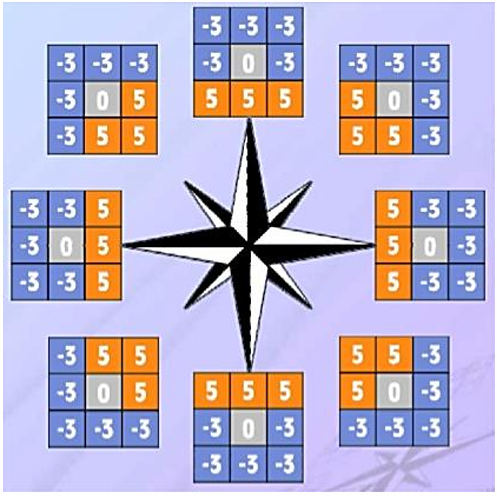

In [9]:

KIRSCH_MASKS = [
    np.array([[ 5,  5,  5],
              [-3,  0, -3],
              [-3, -3, -3]]),
    np.array([[ 5,  5,  3],
              [ 5,  0, -3],
              [ 3, -3, -3]]),
    np.array([[ 5,  3,  0],
              [ 5,  0, -5],
              [ 5, -3, -5]]),
    np.array([[ 3,  5,  5],
              [-3,  0,  5],
              [-3, -3,  3]]),
    np.array([[-3, -3, -3],
              [-3,  0, -3],
              [ 5,  5,  5]]),
    np.array([[-3, -3,  3],
              [-5,  0,  5],
              [-5, -3,  5]]),
    np.array([[-5, -3,  0],
              [ 0,  0,  5],
              [ 5,  3,  5]]),
    np.array([[-3, -3,  3],
              [-3,  0,  5],
              [-3, -5,  5]])
]


def apply_kirsch_edge_detection(image):

    image = get_grayscale(np.array(image))
    h, w = image.shape


    gradient_magnitude = np.zeros((h, w))
    gradient_direction = np.zeros((h, w))


    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)


    for i in range(1, h + 1):
        for j in range(1, w + 1):
            region = padded_image[i-1:i+2, j-1:j+2]

            max_magnitude = 0
            edge_direction = 0

            for k, mask in enumerate(KIRSCH_MASKS):

                response = np.sum(mask * region)


                if abs(response) > max_magnitude:
                    max_magnitude = abs(response)
                    edge_direction = k


            gradient_magnitude[i-1, j-1] = max_magnitude
            gradient_direction[i-1, j-1] = edge_direction


    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    gradient_magnitude = gradient_magnitude.astype(np.uint8)



    return Image.fromarray(gradient_magnitude), gradient_direction


# **Homogeneity Algo**

In [10]:
def homogeneity_algo(image, threshold=5):

    img_array = get_grayscale(np.array(image))
    height, width = img_array.shape

    homogeneity_image = np.zeros_like(img_array)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = img_array[i,j]
            differences = [
                abs(center_pixel - img_array[i-1, j-1]),
                abs(center_pixel - img_array[i-1, j]),
                abs(center_pixel - img_array[i-1, j+1]),
                abs(center_pixel - img_array[i, j-1]),
                abs(center_pixel - img_array[i, j+1]),
                abs(center_pixel - img_array[i+1, j-1]),
                abs(center_pixel - img_array[i+1, j]),
                abs(center_pixel - img_array[i+1, j+1]),
            ]

            homogeneity_value = max(differences)
            homogeneity_image[i, j] = homogeneity_value
            homogeneity_image[i,j] = np.where(homogeneity_image[i,j] >= threshold, homogeneity_image[i,j], 0)

    return Image.fromarray(homogeneity_image.astype(np.uint8))

# **Difference Algo**

In [11]:
def difference_algo(image, threshold=5):

    img_array = get_grayscale(np.array(image))
    height, width = img_array.shape

    difference_image = np.zeros_like(img_array)

    for i in range(1, height - 1):
        for j in range(1, width - 1):

            diff1 = abs(img_array[i-1, j-1] - img_array[i+1, j+1])
            diff2 = abs(img_array[i-1, j+1] - img_array[i+1, j-1])
            diff3 = abs(img_array[i, j-1] - img_array[i, j+1])
            diff4 = abs(img_array[i-1, j] - img_array[i+1, j])

            max_diff = max(diff1, diff2, diff3, diff4)
            difference_image[i, j] = max_diff


            difference_image[i, j] = np.where(difference_image[i, j] >= threshold, difference_image[i, j], 0)

    return Image.fromarray(difference_image.astype(np.uint8))


In [12]:
def apply_kernel(image, kernel):

    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2


    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)


    output = np.zeros_like(image, dtype=float)


    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i + k_h, j:j + k_w]
            output[i, j] = np.sum(region * kernel)

    return output


# Difference Gaussians

In [13]:
def difference_gaussians_algo(image, kernel_size="DoG"):

    mask_7x7 = np.array([
        [0, 0, -1, -1, -1, 0, 0],
        [0, -2, -3, -3, -3, -2, 0],
        [-1, -3, 5, 5, 5, -3, -1],
        [-1, -3, 5, 16, 5, -3, -1],
        [-1, -3, 5, 5, 5, -3, -1],
        [0, -2, -3, -3, -3, -2, 0],
        [0, 0, -1, -1, -1, 0, 0],
    ], dtype=np.float32)

    mask_9x9 = np.array([
        [0, 0, 0, -1, -1, -1, 0, 0, 0],
        [0, -2, -3, -3, -3, -3, -3, -2, 0],
        [0, -3, -2, -1, -1, -1, -2, -3, 0],
        [-1, -3, -1, 9, 9, 9, -1, -3, -1],
        [-1, -3, -1, 9, 19, 9, -1, -3, -1],
        [-1, -3, -1, 9, 9, 9, -1, -3, -1],
        [0, -3, -2, -1, -1, -1, -2, -3, 0],
        [0, -2, -3, -3, -3, -3, -3, -2, 0],
        [0, 0, 0, -1, -1, -1, 0, 0, 0],
    ], dtype=np.float32)


    if kernel_size == "7×7":
        blurred1 = apply_kernel(image, mask_7x7)
        return Image.fromarray(np.clip(blurred1, 0, 255).astype(np.uint8))
    elif kernel_size == "9×9":
        blurred2 = apply_kernel(image, mask_9x9)
        return Image.fromarray(np.clip(blurred2, 0, 255).astype(np.uint8))
    elif kernel_size == "Difference of Gaussian":

        blurred1 = apply_kernel(image, mask_7x7)
        blurred2 = apply_kernel(image, mask_9x9)
        dog = blurred1 - blurred2
        return Image.fromarray(np.clip(dog, 0, 255).astype(np.uint8))

# Contrast Based Edge Detection

In [14]:
def contrast_based_edge_detection(image, name):

    edge_mask = np.array([[-1, 0, -1],
                          [0, 4, 0],
                          [-1, 0, -1]])


    smoothing_mask = np.ones((3, 3)) / 9


    edge_output = apply_kernel(image, edge_mask)
    average_output = apply_kernel(image, smoothing_mask)


    average_output = average_output.astype(float)
    average_output += 1e-10


    contrast_edges = edge_output / average_output


    if name == "contrast_edges":
        return np.clip(contrast_edges, 0, 255).astype(np.uint8)
    elif name == "edge_output":
        return np.clip(edge_output, 0, 255).astype(np.uint8)
    elif name == "average_output":
        return np.clip(average_output, 0, 255).astype(np.uint8)


# Variance Operator && Range Operator

In [15]:
def variance_operator(image):
    img_array = np.array(image)
    output = np.zeros_like(img_array, dtype=np.uint8)
    height, width = img_array.shape[:2]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            mean = np.mean(neighborhood)
            variance = np.sum((neighborhood - mean) ** 2) / 9
            output[i, j] = np.clip(variance, 0, 255)

    return Image.fromarray(output)


def range_operator(image):
    img_array = np.array(image)
    output = np.zeros_like(img_array, dtype=np.uint8)
    height, width = img_array.shape[:2]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            range_value = np.max(neighborhood) - np.min(neighborhood)
            output[i, j] = np.clip(range_value, 0, 255)

    return Image.fromarray(output)


# High pass && Low pass && Median Filter

In [16]:
def high_pass(image):

    mask_3x3_high_pass = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ], dtype=np.float32)


    img_array = np.array(image.convert('L'))


    result = apply_kernel(img_array, mask_3x3_high_pass)


    result = np.clip(result, 0, 255).astype(np.uint8)

    return Image.fromarray(result)

def low_pass(image):

    mask_3x3_low_pass = np.array([
        [0, 1/6, 0],
        [1/6, 2/6, 1/6],
        [0, 1/6, 0]
    ], dtype=np.float32)


    img_array = np.array(image.convert('L'))


    result = apply_kernel(img_array, mask_3x3_low_pass)


    result = np.clip(result, 0, 255).astype(np.uint8)

    return Image.fromarray(result)

def median_filter(image):

    img_array = np.array(image.convert('L'))
    output = np.zeros_like(img_array, dtype=np.uint8)
    height, width = img_array.shape


    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            median_value = np.median(neighborhood)
            output[i, j] = median_value

    return Image.fromarray(output)

# Add && Subtract && Invert Operation

In [17]:
def add_operation(image1, image2):

    image1_array = np.array(image1)
    image2_array = np.array(image2)


    height, width = image1_array.shape


    added_image = np.zeros_like(image1_array, dtype=np.uint8)


    for i in range(height):
        for j in range(width):
            added_image[i, j] = image1_array[i, j] + image2_array[i, j]
            added_image[i, j] = max(0, min(added_image[i, j], 255))

    return Image.fromarray(added_image)

def subtract_operation(image1, image2):

    image1_array = np.array(image1)
    image2_array = np.array(image2)


    height, width = image1_array.shape


    subtracted_image = np.zeros_like(image1_array, dtype=np.uint8)


    for i in range(height):
        for j in range(width):
            subtracted_image[i, j] = image1_array[i, j] - image2_array[i, j]
            subtracted_image[i, j] = max(0, min(subtracted_image[i, j], 255))

    return Image.fromarray(subtracted_image)

def invert(image):

    image_array = np.array(image)


    height, width = image_array.shape


    inverted_image = np.zeros((height, width), dtype=np.uint8)


    for i in range(height):
        for j in range(width):
            inverted_image[i, j] = 255 - image_array[i, j]


    return Image.fromarray(inverted_image)


# Segmentation

In [18]:
def calculate_histogram(image):

    histogram = np.zeros(256, dtype=int)
    for pixel_value in image.flatten():
        histogram[pixel_value] += 1
    return histogram, np.arange(256)

def find_histogram_peaks(hist):

    peaks = np.argpartition(hist, -2)[-2:]
    peaks = sorted(peaks, key=lambda x: hist[x], reverse=True)
    return peaks

def calculate_thresholds(peaks_indices, hist):

    peak1 = peaks_indices[0]
    peak2 = peaks_indices[1]
    low_threshold = (peak1+peak2) // 2
    high_threshold = peak2
    return low_threshold, high_threshold

def find_valley_point(peaks_indices, hist):
    valley_point = 0
    min_valley = float('inf')


    start, end = sorted(peaks_indices)


    for i in range(start, end + 1):
        if hist[i] < min_valley:
            min_valley = hist[i]
            valley_point = i

    return valley_point



In [19]:
def manual_segmentation(image, low_threshold, high_threshold, value=255):
    image_array = np.array(image)
    segmentation_image = np.zeros_like(image_array)
    segmentation_image[(image_array >= low_threshold) & (image_array <= high_threshold)] = value
    return Image.fromarray(segmentation_image)

def histogram_peak_threshold_segmentation(image):
    image_array = np.array(image)
    hist, bins = calculate_histogram(image_array)
    peaks_indices = find_histogram_peaks(hist)
    low_threshold, high_threshold = calculate_thresholds(peaks_indices, hist)
    segmented_image = np.zeros_like(image_array)
    segmented_image[(image_array >= low_threshold) & (image_array <= high_threshold)] = 255
    return Image.fromarray(segmented_image)

def histogram_valley_threshold_segmentation(image):

    image_array = np.array(image)

    hist, bins = calculate_histogram(image_array)

    peaks_indices = find_histogram_peaks(hist)


    valley_point = find_valley_point(peaks_indices, hist)

    low_threshold = valley_point
    high_threshold = peaks_indices[1]


    segmented_image = np.zeros_like(image_array)
    segmented_image[(image_array >= low_threshold) & (image_array <= high_threshold)] = 255

    return Image.fromarray(segmented_image)


def adaptive_histogram_threshold_segmentation(image):

    image_array = np.array(image)
    hist, bins = calculate_histogram(image_array)
    peaks_indices = find_histogram_peaks(hist)
    valley_point = (peaks_indices[0] + peaks_indices[1]) // 2
    low_threshold = min(peaks_indices[0], peaks_indices[1])
    high_threshold = max(peaks_indices[0], peaks_indices[1])

    segmented_image = np.zeros_like(image_array)
    segmented_image[(image_array >= low_threshold) & (image_array <= high_threshold)] = 255


    background_mean = np.mean(image_array[segmented_image == 0])
    object_mean = np.mean(image_array[segmented_image == 255])
    new_peaks_indices = [int(background_mean), int(object_mean)]
    new_valley_point = (new_peaks_indices[0] + new_peaks_indices[1]) // 2
    new_low_threshold = min(new_peaks_indices[0], new_peaks_indices[1])
    new_high_threshold = max(new_peaks_indices[0], new_peaks_indices[1])

    final_segmented_image = np.zeros_like(image_array)
    final_segmented_image[(image_array >= new_low_threshold) & (image_array <= new_high_threshold)] = 255

    return Image.fromarray(final_segmented_image)


# GUI

In [32]:
def apply_algorithm(img, algorithm, kernel_size=None, name=None, second_img=None):
    img_array = np.array(img)  
    
   
    img_array2 = np.array(second_img) if second_img is not None else None

    if algorithm == "Grayscale":
        processed_array = get_grayscale(img_array)
    elif algorithm == "Threshold":
        grayscale = get_grayscale(img_array)
        processed_array = calculate_threshold(grayscale)
    elif algorithm == "Halftoning":
        grayscale_image = get_grayscale(img_array)  
        processed_array = error_diffusion_halftoning(grayscale_image)
    elif algorithm == "Histogram Equalization":
        grayscale_image = get_grayscale(img_array)  
        processed_array = histogram_equalization(grayscale_image)
    elif algorithm == "Sobel":
        processed_array = apply_sobel_edge_detection(img)
    elif algorithm == "Prewitt":
        processed_array = apply_prewitt_edge_detection(img)
    elif algorithm == "Kirsch Edge Detection":
        processed_image, edge_direction = apply_kirsch_edge_detection(img)
        return processed_image
    elif algorithm == "Manual Segmentation":
        grayscale_image = get_grayscale(img_array) 
        processed_image = manual_segmentation(img_array, low_threshold=100, high_threshold=200, value=255)
        return processed_image
    elif algorithm == "Histogram Peak Segmentation":
        grayscale_image = get_grayscale(img_array) 
        processed_image = histogram_peak_threshold_segmentation(grayscale_image)
        return processed_image
    elif algorithm == "Histogram Valley Segmentation":
        grayscale_image = get_grayscale(img_array) 
        processed_image = histogram_valley_threshold_segmentation(grayscale_image)
        return processed_image
    elif algorithm == "Adaptive Histogram Segmentation":
        grayscale_image = get_grayscale(img_array) 
        processed_image = adaptive_histogram_threshold_segmentation(grayscale_image)
        return processed_image
    elif algorithm == "Homogeneity":
        processed_array = homogeneity_algo(img)  
    elif algorithm == "Difference":
        processed_array = difference_algo(img)  
    elif algorithm == "Difference of Gaussians":
        grayscale_image = get_grayscale(img_array)
        processed_array = difference_gaussians_algo(grayscale_image, kernel_size)
    elif algorithm == "Contrast-Based Edge Detection":
        grayscale_image = get_grayscale(img_array)
        processed_array = contrast_based_edge_detection(grayscale_image, name)
    elif algorithm == "Variance":
        processed_array = variance_operator(img)  
    elif algorithm == "Range":
        processed_array = range_operator(img)  
    elif algorithm == "High-Pass Filter":
        processed_array = high_pass(img)  
    elif algorithm == "Low-Pass Filter":
        processed_array = low_pass(img)  
    elif algorithm == "Median Filter":
        processed_array = median_filter(img)  
    elif algorithm == "Addition":
        grayscale1 = get_grayscale(img_array)
        grayscale2 = get_grayscale(img_array2) if second_img is not None else None
        if second_img is not None:
            processed_array = add_operation(grayscale1, grayscale2)  
        else:
            return img  
    elif algorithm == "Subtraction":
        grayscale1 = get_grayscale(img_array)
        grayscale2 = get_grayscale(img_array2) if second_img is not None else None
        if second_img is not None:
            processed_array = subtract_operation(grayscale1, grayscale2)  
        else:
            return img  
    elif algorithm == "Invert":
        grayscale = get_grayscale(img_array)
        processed_image = invert(grayscale)
        return processed_image  
    else:
        return img  

    if isinstance(processed_array, np.ndarray):  
        processed_image = Image.fromarray(processed_array.astype(np.uint8))
    else: 
        processed_image = processed_array

    return processed_image

# Gradio Interface
with gr.Blocks() as interface:
    with gr.Row(): 
        algorithm_selector = gr.Radio(
            ["Grayscale", "Threshold", "Halftoning", "Histogram Equalization", "Sobel", "Prewitt", "Kirsch Edge Detection", 
             "Manual Segmentation", "Histogram Peak Segmentation", "Histogram Valley Segmentation", "Adaptive Histogram Segmentation",
             "Homogeneity", "Difference", "Difference of Gaussians", "Contrast-Based Edge Detection", "Variance", "Range",
             "High-Pass Filter", "Low-Pass Filter", "Median Filter", "Addition", "Subtraction", "Invert"],
            label="Select Algorithm"
        )

    with gr.Row():  
        with gr.Column():
            img_input = gr.Image(type="pil", label="Input Image") 
        with gr.Column():
            img_output = gr.Image(type="pil", label="Output Image")  
    with gr.Row(visible=False) as gaussian_row:  
        kernel_size_selector = gr.Radio(
            ["7×7", "9×9", "Difference of Gaussian"],
            label="Select Kernel Size"
        )

    with gr.Row(visible=False) as contrast_row:  
        name_selector = gr.Radio(
            ["contrast_edges", "edge_output", "average_output"],
            label="Select Output for Contrast-Based Edge Detection"
        )

    with gr.Row(visible=False) as second_img_input_row:
        second_img_input = gr.Image(type="pil", label="Second Image (for Addition/Subtraction)")

    with gr.Row():  
        apply_button = gr.Button("Apply")

    def update_contrast_visibility(algorithm):
        return gr.update(visible=algorithm == "Contrast-Based Edge Detection")
    
    def update_visibility(algorithm):
        return gr.update(visible=algorithm == "Difference of Gaussians")
    
    def update_second_img_visibility(algorithm):
        return gr.update(visible=algorithm in ["Addition", "Subtraction"])
    
    # Combined processing logic
    def process_image(img, algorithm, kernel_size, name, second_img):
        if algorithm == "Difference of Gaussians":
            return apply_algorithm(img, algorithm, kernel_size, None, second_img)
        elif algorithm == "Contrast-Based Edge Detection":
            return apply_algorithm(img, algorithm, None, name, second_img)
        elif algorithm in ["Addition", "Subtraction"]:
            return apply_algorithm(img, algorithm, None, None, second_img)
        else:
            return apply_algorithm(img, algorithm, None, None, second_img)
    
    # Link visibility and processing logic
    algorithm_selector.change(
        update_visibility, 
        inputs=algorithm_selector, 
        outputs=gaussian_row
    )
    
    algorithm_selector.change(
        update_contrast_visibility, 
        inputs=algorithm_selector, 
        outputs=contrast_row
    )
    
    algorithm_selector.change(
        update_second_img_visibility, 
        inputs=algorithm_selector, 
        outputs=second_img_input_row
    )
    
    apply_button.click(  
        process_image, 
        inputs=[img_input, algorithm_selector, kernel_size_selector, name_selector, second_img_input],
        outputs=img_output
    )

interface.launch()


* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
